## Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

## Read Data from file

In [14]:
df = pd.read_csv('Apparel/apparel-trainval.csv')

In [81]:
df = df[0:6000]
train,validate = train_test_split(df,test_size = 0.2)

df_label=df['label']
train_label=train['label']
train=train.drop('label',axis=1)

validate_label=validate['label']
validate=validate.drop('label',axis=1)

rows = train.shape[0]  
cols = train.shape[1] 
validate_rows=validate.shape[0]


## Convert Label into Label vector

In [82]:
#output vector for 10 classes
train_label_vector = []

for i in (train_label):
    temp=np.zeros((1, 10))
    temp[0][i]=1
    train_label_vector.append(temp)

train_label_vector=np.array(train_label_vector).squeeze()
train_label_vector.shape


validate_label_vector = []

for i in (validate_label):
    temp=np.zeros((1, 10))
    temp[0][i]=1
    validate_label_vector.append(temp)

validate_label_vector=np.array(validate_label_vector).squeeze()
validate_label_vector.shape

(200, 10)

## Class to put Weight and Bias between Layers

In [83]:
class Wgt_n_Bias:
    def __init__(self, current_layer_nodes,next_layer_nodes, activation_function):
        #nodes in current layer
        self.current_layer_nodes = current_layer_nodes
        #nodes in next layer
        self.next_layer_nodes = next_layer_nodes
        #activation_function 
        self.activation_function = activation_function
        #activations
        self.activations = np.zeros([current_layer_nodes,1])
        
        # putting weights and bias for layers
        
        # if not output layer set random weights and bias
        if next_layer_nodes != 0:
            self.weights = np.random.normal(0, 0.001, size=(current_layer_nodes, next_layer_nodes))
            self.bias = np.random.normal(0, 0.001, size=(1, next_layer_nodes))
        # if output layer set weight and bias to None
        else:
            self.weights = None
            self.bias = None

## Functions 

In [84]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))

def sigmoid_der(x):  
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def tanh(x):
    return np.tanh(x)

def relu(x):
    x[x < 0] = 0
    return x

def tanh_der(x):
    return 1.0 - np.tanh(x)**2

def relu_der(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

## Class to  make Neural Nertwork

In [122]:
class Neu_net:
    def __init__(self, layers, node_list, activation_function):
        self.layers = layers
        self.node_list = node_list
        self.layer_list = []
        self.error = 0
        self.learning_rate = 0.0001
        self.cost_function = "cross_entropy"

        for i in range(layers):
            
            if i != layers-1:
                layer_i = Wgt_n_Bias(node_list[i], node_list[i+1], activation_function[i])
            else:
                #if i is output layer
                layer_i = Wgt_n_Bias(node_list[i], 0, activation_function[i])
            self.layer_list.append(layer_i)
                   

    def forward_propagation(self, inputs):
        self.layer_list[0].activations = inputs
        for i in range(self.layers-1):
            
            temp = np.add(np.matmul(self.layer_list[i].activations, self.layer_list[i].weights), self.layer_list[i].bias)

            if self.layer_list[i+1].activation_function == "sigmoid":
                self.layer_list[i+1].activations = sigmoid(temp)
            elif self.layer_list[i+1].activation_function == "softmax":
                self.layer_list[i+1].activations = softmax(temp)
            elif self.layer_list[i+1].activation_function == "relu":
                self.layer_list[i+1].activations = relu(temp)
            elif self.layer_list[i+1].activation_function == "tanh":
                self.layer_list[i+1].activations = tanh(temp)
            else:
                self.layer_list[i+1].activations = temp
                
    def Error_func(self,label_vector):
            self.error = np.sum(-label_vector * np.log(self.layer_list[-1].activations))
        
    def back_propagation(self,label_vector):
        
        #for the weight and bias of output layer
        i = self.layers-1
        diff_a_z=0
        diff_e_z=self.layer_list[i].activations-label_vector
        diff_z_w=self.layer_list[i-1].activations
        diff_e_w=np.dot(diff_z_w.T, diff_e_z) 
        diff_e_b=diff_e_z

        self.layer_list[i-1].weights -= self.learning_rate * diff_e_w
        self.layer_list[i-1].bias -= self.learning_rate * diff_e_b.sum(axis=0)
       
        for i in range(i-1,0,-1):
            diff_z_a=self.layer_list[i].weights
            diff_e_a=np.dot(diff_e_z,diff_z_a.T)
            
            temp = np.add(np.matmul(self.layer_list[i-1].activations, self.layer_list[i-1].weights), self.layer_list[i-1].bias)

            if self.layer_list[i].activation_function == "sigmoid":
                diff_a_z=sigmoid_der(temp)
            if self.layer_list[i].activation_function == "relu":
                diff_a_z=relu_der(temp)
            if self.layer_list[i].activation_function == "tanh":
                diff_a_z=tanh_der(temp)

            diff_z_w=self.layer_list[i-1].activations
            diff_e_w=np.dot(diff_z_w.T,(diff_a_z*diff_e_a))
            diff_e_b = diff_e_a*diff_a_z
            diff_e_z=diff_e_b
    
            self.layer_list[i-1].weights -= self.learning_rate * diff_e_w
            self.layer_list[i-1].bias -= self.learning_rate * diff_e_b.sum(axis=0)
                         

## Training Neural Network

In [123]:
def Training_Network(batch_size, inputs, labels, num_epochs):
    for j in range(num_epochs):
        i = 0
        while i+batch_size != len(inputs): 
            nn.error = 0
            nn.forward_propagation(inputs[i:i+batch_size])
            nn.Error_func(labels[i:i+batch_size])
            nn.back_propagation(labels[i:i+batch_size])
            i += batch_size

In [136]:
# nn=Neu_net(layers=3, [l1,l2,l3], [None,"f2","f3"])
nn=Neu_net(3, [784,170,10], [None,"sigmoid","softmax"])

In [137]:
Training_Network(100,train,train_label_vector,1000)

## Weight & Bias: Saving and Retrieving by file

In [138]:
for i in range(nn.layers):
    np.save('wgts'+str(i)+'.npy',nn.layer_list[i].weights)
    np.save('bias'+str(i)+'.npy',nn.layer_list[i].bias)

In [139]:
for i in range(nn.layers):
    nn.layer_list[i].weights = np.load('wgts'+str(i)+'.npy')
    nn.layer_list[i].bias=np.load('bias'+str(i)+'.npy')

## Testing data-Calculating Accuracy

In [140]:
nn.forward_propagation(validate)

In [141]:
count=0
err_list=[]
for i in range(validate_rows):  
    actual=np.argmax(validate_label_vector[i])
    predicted=np.argmax(nn.layer_list[-1].activations[i])
    if(actual==predicted):
        count+=1
accuracy=(float(count)/validate_rows)*100
accuracy


78.5

## ACCURACIES
### Accuracy from tanh : 69.90 
### Accuracy from Relu :11.99   
### Accuracy from Sigmoid: 78.50


## Plotting Layers vs Prediction Loss

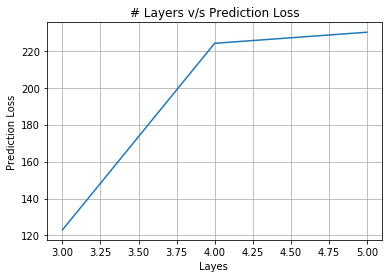

In [3]:
plt.plot([3,4,5], [123,224,230])
plt.xlabel('Layes ')
plt.ylabel('Prediction Loss')
plt.title('# Layers v/s Prediction Loss')
plt.grid(True)
plt.show()

## Plotting error vs epochs

In [144]:
error=[]
epochs=[]
for i in range(10,200,20):
    epochs.append(i)
    nn=Neu_net(3, [784,170,10], [None,"sigmoid","softmax"])
    Training_Network(100,train[0:2000],train_label_vector,i)
    nn.forward_propagation(validate)
    count=0
    for i in range(validate_rows):  
        actual=np.argmax(validate_label_vector[i])
        predicted=np.argmax(nn.layer_list[-1].activations[i])
        if(actual==predicted):
            count+=1
    error.append((1-float(count)/validate_rows)*100)

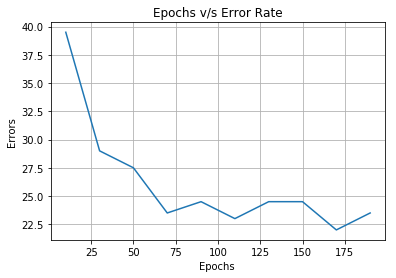

In [145]:
plt.plot(epochs,error)
plt.xlabel('Epochs ')
plt.ylabel('Errors')
plt.title('Epochs v/s Error Rate')
plt.grid(True)
plt.show()

## Running model on Test file

In [100]:
test = pd.read_csv('Apparel/apparel-test.csv')

In [101]:
nn.forward_propagation(test)

In [102]:
predicted=np.zeros([len(test)])
for i in range(len(test)):
    predicted[i]=np.argmax(nn.layer_list[-1].activations[i])
    

In [103]:
np.savetxt("2018201021_prediction.csv", predicted.tolist(), delimiter=",",header='predicted')

In [104]:
p=pd.read_csv("2018201021_prediction.csv")
p.head()

,# predicted
0,6.0
1,1.0
2,2.0
3,6.0
4,1.0


## Q-2

### For predicting the sale price of a house -
### We are using neural network with 3 layers.
### we will Use ‘RELU’ as the activation function for the hidden layers
### as the it gives value max(0,x). 
### We can use 'mean_absolute_error' or 'mean square error' as a loss function
### We will Define the output layer with only one node to predict the sale price  
### we will Use ‘linear’ as the activation function for the output layer as we want ouput as a predicted linear 
### value based on the model.